# 워드클라우드
1. 라이브러리 이름은 wordcloud

In [10]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  DEPRECATION: wordcloud is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  × Running setup.py install for wordcloud did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      running install
      C:\Users\shoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\color_from_image.py -> build\lib.w

In [2]:
!pip install konlpy

     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     - -------------------------------------- 0.9/19.4 MB 28.1 MB/s eta 0:00:01
     ---- ----------------------------------- 2.4/19.4 MB 38.6 MB/s eta 0:00:01
     ---------- ----------------------------- 4.9/19.4 MB 44.5 MB/s eta 0:00:01
     --------------- ------------------------ 7.6/19.4 MB 44.1 MB/s eta 0:00:01
     -------------------- ------------------ 10.3/19.4 MB 46.7 MB/s eta 0:00:01
     ------------------------- ------------- 12.7/19.4 MB 54.7 MB/s eta 0:00:01
     ----------------------------- --------- 14.6/19.4 MB 50.4 MB/s eta 0:00:01
     ---------------------------------- ---- 17.0/19.4 MB 46.7 MB/s eta 0:00:01
     --------------------------------------  19.4/19.4 MB 50.4 MB/s eta 0:00:01
     --------------------------------------- 19.4/19.4 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/345.1 kB ? eta -:--:--
     ---------------------------------------- 345.1/345


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from wordcloud import WordCloud

In [1]:
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt

In [14]:
import numpy as np
from PIL import Image

In [2]:
text = open('hiphop.txt', encoding = "euc-kr").read()

In [3]:
text

'"보고 싶다\n이렇게 말하니까 더 보고 싶다\n너희 사진을 보고 있어도\n보고 싶다\n너무 야속한 시간\n나는 우리가 밉다\n이젠 얼굴 한번 보는 것 조차\n힘들어진 우리가\n여긴 온통 겨울 뿐이야\n8월에도 겨울이 와\n마음은 시간을 달려가네\n홀로 남은 설국열차\n니 손 잡고 지구 반대편까지 가\n겨울을 끝내고파\n그리움들이 얼마나\n눈처럼 내려야 그 봄날이 올까\nFriend\n허공을 떠도는\n작은 먼지처럼 작은 먼지처럼\n날리는 눈이 나라면\n조금 더 빨리\n네게 닿을 수 있을 텐데\n눈꽃이 떨어져요\n또 조금씩 멀어져요\n보고 싶다 보고 싶다\n보고 싶다 보고 싶다\n얼마나 기다려야\n또 몇 밤을 더 새워야\n널 보게 될까 널 보게 될까\n만나게 될까 만나게 될까\n추운 겨울 끝을 지나\n다시 봄날이 올 때까지\n꽃 피울 때까지\n그곳에 좀 더 머물러줘 \n머물러줘\n니가 변한 건지\n니가 변한 건지\n아니면 내가 변한 건지\n내가 변한 건지\n이 순간 흐르는 시간조차 미워\n우리가 변한 거지 뭐\n모두가 그런 거지 뭐\n그래 밉다 니가 넌 떠났지만\n단 하루도 너를\n잊은 적이 없었지 난\n솔직히 보고 싶은데\n이만 너를 지울게\n그게 널 원망하기보단\n덜 아프니까\n시린 널 불어내 본다\n연기처럼 하얀 연기처럼\n말로는 지운다 해도\n사실 난 아직 널 보내지 못하는데\n눈꽃이 떨어져요\n또 조금씩 멀어져요\n보고 싶다 보고 싶다\n보고 싶다 보고 싶다\n얼마나 기다려야\n또 몇 밤을 더 새워야\n널 보게 될까 널 보게 될까\n만나게 될까 만나게 될까\nYou know it all\nYou\'re my best friend\n아침은 다시 올 거야\n어떤 어둠도 어떤 계절도\n영원할 순 없으니까\n벚꽃이 피나봐요\n이 겨울도 끝이 나요\n보고 싶다 보고 싶다 \n보고 싶다 보고 싶다\n조금만 기다리면\n며칠 밤만 더 새우면\n만나러 갈게 만나러 갈게\n데리러 갈게 데리러 갈게\n추운 겨울 끝을 지나\n다시 봄날이 올 때까지\n꽃 피울 때까지\n그곳에

In [4]:
okt = Okt()

# Okt 함수를 이용하여 내용의 형태를 분석
nouns = okt.nouns(text)

In [7]:
words = [n for n in nouns if len(n)>1]

In [8]:
cnt = Counter(words)

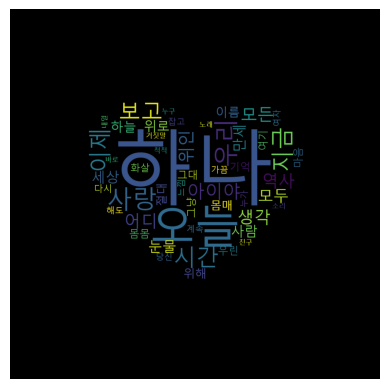

In [18]:
img = Image.open("heart.png")
img_array = np.array(img)

wc = WordCloud(
    font_path='malgun',
    width = 400,
    height = 400,
    scale = 2.0,
    max_font_size = 250,
    max_words = 50,
    mask = img_array
)
gen = wc.generate_from_frequencies(cnt)
plt.figure()
plt.axis('off')
plt.imshow(gen)